In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd 
import seaborn as sns; sns.set()

In [2]:
from collections import Counter

In [3]:
# for the purpose of emotions sense/direction analysis
from extractEmotions import emotionalDirection

## Functions for analysis

In [4]:
def plotIntensity(emotions_intensity):
    plt.figure(figsize=(10,10))
    emotions_intensity.plot(kind="kde")
    plt.title("Emotions embedded in tweets")
    plt.xlabel("Emotions sense")
    plt.show()

In [5]:
def generalEmotionsCount(dataframe, emotions_columns, save=False):
    dominant_emotions_tweets = []
    emotion = []
    for column in emotions_columns:
        # extract the tweets in which the emotion's probability is higher than 50%
        # this allows to capture the dominant emotion
        # append those to a list
        dominant_emotions_tweets.append(len(dataframe[dataframe[column] > 0.5]) / len(dataframe))
        # append the column name to know which emotions is that
        emotion.append(column)
    # the output is a transposed dataframe
    output_df = pd.DataFrame([emotion, dominant_emotions_tweets]).T
    output_df.columns = ["dominant_emotion", "fraction_of_tweets"]
    # possibility to save it in the "data" directory
    if save:
        if ~(os.path.isdir("data")):
            os.mkdir("data")
        output_df.to_csv("data/general_overview_of_dominant_emotions.csv")
    return output_df

In [6]:
def plotDominantEmotions(dataframe):
    plt.figure(figsize=(8,5))
    ax = sns.barplot(x="dominant_emotion", y="fraction_of_tweets", data=emotions_fractions_df)
    plt.xlabel("Dominant Emotions")
    plt.ylabel("Fraction of Tweets")
    plt.title("Emotions which probability exceeded 50% in tweets")
    plt.show()

## Loading the dataset

In [7]:
df = pd.read_csv("data/tweets_emotions_dataset.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

## Studying emotions intensity

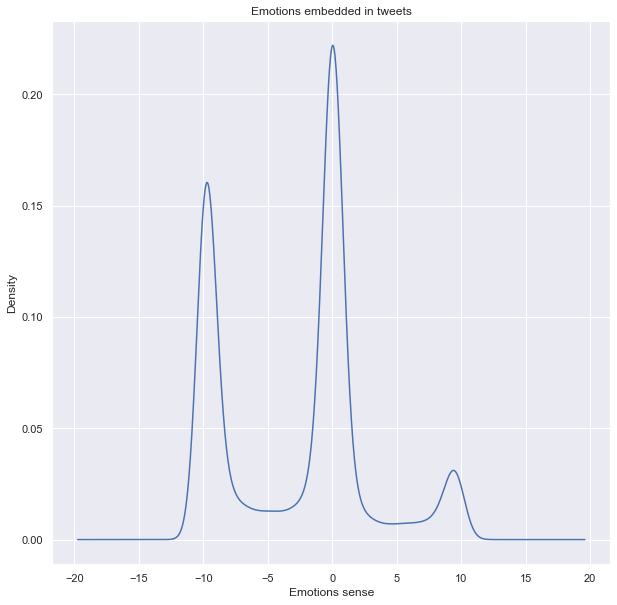

In [8]:
plotIntensity(df["intensity"])

### Including the analysis of fear and surprise 
10 times lower weights, fear and surpirse have the same weight as sadness

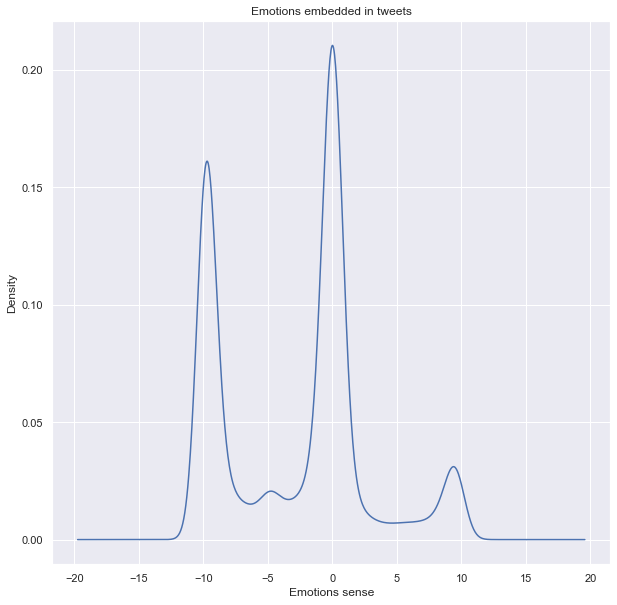

In [9]:
plotIntensity(emotionalDirection(df, joy_weight=10, 
                                 sadness_weight=-1, 
                                 anger_weight=-10, 
                                 disgust_weight=-10, 
                                 surprise_weight=-5, 
                                 fear_weight=-5, 
                                 others_weight=0))

As seen above, assigning moderately negative weights to fear and surprise, they became visible as a hill between neutral and negative emotions. 

It is quite evident that the majority of tweets can be perceived as neutral message. There are 2 more major hills in these plots - on the left hand side, the *negative*, hateful tweets which are characterized by high scores for anger, disgust or both. On the right hand side, the *positive* tweets, those for which the model yielded high *joy* probabilities.

Unfortunately, these results suggest that apart from a mixture of emotions or neutrality visualized as the major hill near 0, the tweets are characterized by dominant *negative* emotions in this political debate. 

## Dominant Emotions

Emotions for which the probability yielded by model exceeded 50%. The plot presents the fraction of tweets which met this condition. In short, these are the tweets evidently neutral / joyful / sad / fearful / surprised / angry or disgusted.

In [10]:
emotions_fractions_df = generalEmotionsCount(df, ["others", "joy", "sadness", "fear", "surprise", "anger", "disgust"])

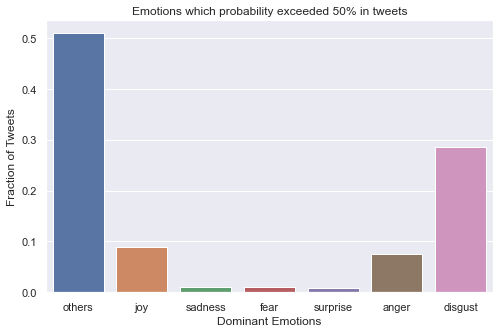

In [11]:
plotDominantEmotions(emotions_fractions_df)

This analysis seems to confirm the correctness of the results obtained in the section above.

## Emotions in states

### Average emotions intensity for states

In [12]:
intensity_mean = pd.DataFrame(df.groupby("state")["intensity"].apply(np.mean))

The most negative average intensity of emotions

In [13]:
intensity_mean.sort_values("intensity")[:10]

,intensity
state,
Hawaii,-5.868438
Vermont,-5.621437
Idaho,-4.388872
Oklahoma,-4.310645
Arkansas,-4.166333
South Carolina,-4.061919
Kentucky,-3.940761
Montana,-3.739287
North Dakota,-3.660641


The most positive average intensity of emotions

In [14]:
intensity_mean.sort_values("intensity").tail(10)

,intensity
state,
California,-1.806190
Massachusetts,-1.620495
Connecticut,-1.566188
South Dakota,-1.495659
Washington,-1.436248
Colorado,-1.380430
Maine,-1.158293
Maryland,-0.873765
New Mexico,-0.626226


### States: standard deviation for emotions intensities

In [15]:
intensity_std = pd.DataFrame(df.groupby("state")["intensity"].apply(np.std))

#### 10 states in which the distribution of emotions intensity is closest to the mean 

In [16]:
intensity_std.sort_values("intensity")[:10]

,intensity
state,
Vermont,4.092366
Rhode Island,4.797176
New Jersey,5.147460
Alaska,5.184232
Massachusetts,5.235030
Florida,5.266397
Maine,5.268515
Montana,5.392623
Virginia,5.412066


#### 10 states in which the distribution of emotions is scattered further from the mean

In [17]:
intensity_std.sort_values("intensity")[-10:]

,intensity
state,
Kansas,5.944555
Arkansas,5.945234
Wisconsin,6.009267
Mississippi,6.017767
Washington,6.022172
North Dakota,6.138799
Michigan,6.199146
Iowa,6.289677
South Dakota,6.339204


### How far are the emotion intensities from the mean: skewness

In [18]:
intensity_std.median()

intensity    5.685423
dtype: float64

In [19]:
intensity_std.mean()

intensity    5.662177
dtype: float64

As seen above, the distribution of the scatter around the mean among the emotions grouped by states is quite symmetrical

## The emotions with the biggest fraction for states

Below, the mean likelihood for each emotion is analyzed for each state. In this context, the probabilities returned by the model's predict() method should be seen as weights - how angry the tweet seems to be? Or how happy it is - based on what the model has learnt about *typical* happiness embedded in tweets. 

In [20]:
df.groupby("state")[["joy","sadness","anger","surprise","disgust","fear"]].mean().idxmax(axis=1)

state
Alabama           disgust
Alaska            disgust
Arizona           disgust
Arkansas          disgust
California        disgust
Colorado          disgust
Connecticut       disgust
Delaware              joy
Florida           disgust
Georgia           disgust
Hawaii            disgust
Idaho             disgust
Illinois          disgust
Iowa              disgust
Kansas            disgust
Kentucky          disgust
Louisiana         disgust
Maine               anger
Maryland          disgust
Massachusetts     disgust
Michigan          disgust
Minnesota         disgust
Mississippi       disgust
Missouri          disgust
Montana           disgust
Nebraska          disgust
Nevada            disgust
New Hampshire     disgust
New Jersey        disgust
New Mexico            joy
New York          disgust
North Carolina    disgust
North Dakota      disgust
Ohio              disgust
Oklahoma          disgust
Oregon            disgust
Pennsylvania      disgust
Rhode Island      disgust
South 

As can be seen, the most common nominal value is disgust

Only 3 states have different average dominant emotions than disgust - these are joy and anger.

# Emotions grouped by party dominance

#### Mean emotions intensity for states grouped by the dominant party

In [21]:
mean_intensities = pd.DataFrame(df.groupby("dominant_party")["intensity"].apply(np.mean))
democrats_mean = mean_intensities.iloc[0][0]
republicans_mean = mean_intensities.iloc[1][0]
swing_mean = mean_intensities.iloc[0][0]
mean_intensities

,intensity
dominant_party,
democrat,-2.254968
republican,-3.380201
swing,-2.410663


#### Median for emotions intensity for states grouped by the dominant party

In [22]:
median_intensities = pd.DataFrame(df.groupby("dominant_party")["intensity"].apply(np.median))
democrats_median = median_intensities.iloc[0][0]
republicans_median = median_intensities.iloc[1][0]
swing_median = median_intensities.iloc[0][0]
median_intensities

,intensity
dominant_party,
democrat,-0.086418
republican,-1.012422
swing,-0.098029


It seems like all of the distributions are negatively skewed, usually the intensities have higher scores than the mean score. There may be a negative score on average, but the majority of people tend to express more positive emotions which are reflected by their intensities. This is mostly due to *neutral* emotions being the dominant intensity.

We can see that especially for swing and democrat groups of states for which the emotions intensities are close to 0. For republican group of states, we can see that the majority of tweets still have a bit more positive emotion intinsity than the average for this group of states, however, they tend to be more negative than the tweets from democrat or swing states.

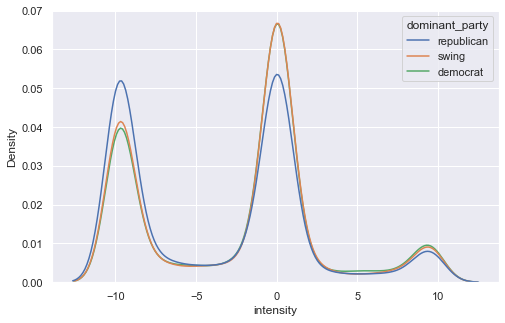

In [23]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="intensity", hue="dominant_party",)
plt.show()

The kernel density estimation plot above visualized the common pattern for all groups of states.

In [24]:
def plotIntensityDistribution(dominant_p, mean_p, median_p, color_hue):
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df[df.dominant_party == dominant_p], x="intensity", color=color_hue)
    plt.axvline(mean_p, color="orange", linestyle='--')
    plt.axvline(median_p, color="olive", linestyle='--')
    plt.show()

## Emotions intensities' distributions

The data **mean** is shown as a ORANGE dashed line, the **median** is shown as a OLIVE dashed line

### Republican

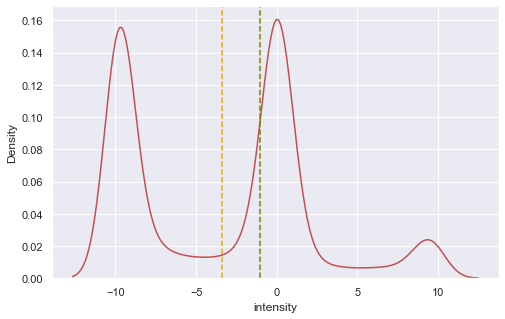

In [25]:
plotIntensityDistribution("republican", republicans_mean, republicans_median, "r")

### Democrat

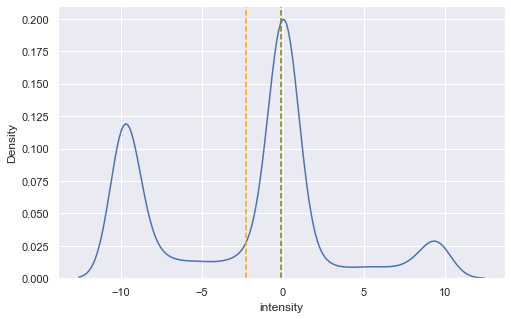

In [26]:
plotIntensityDistribution("democrat", democrats_mean, democrats_median, "b")

### Swing

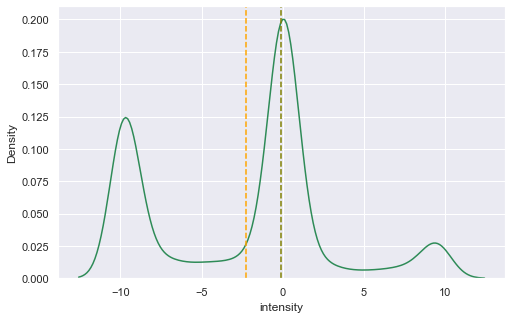

In [27]:
plotIntensityDistribution("swing", swing_mean, swing_median, "seagreen")

All the distributions are characterized by a smaller mean than median. This indicates a negative skewness of the data distribution. All of the states groups have a similar pattern. The most similar ditributions are those for democrat and swing states. 

## Individual emotions analysis by state groups

In [28]:
def plotIndividualEmotion(emotion):
    plt.figure(figsize=(8,5))
    sns.barplot(data=df, x="dominant_party", y=emotion)
    plt.title(emotion)
    plt.xlabel("Dominant Party")
    plt.ylabel("Fraction")
    plt.show()

### Joy

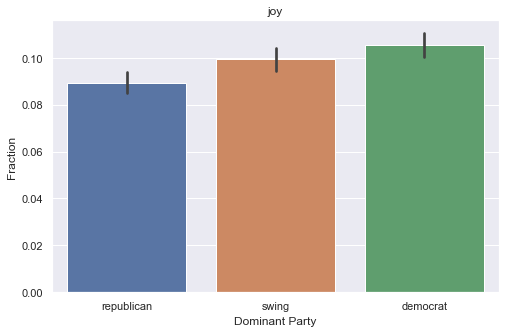

In [29]:
plotIndividualEmotion("joy")

Similar: swing and democrat

### Sadness

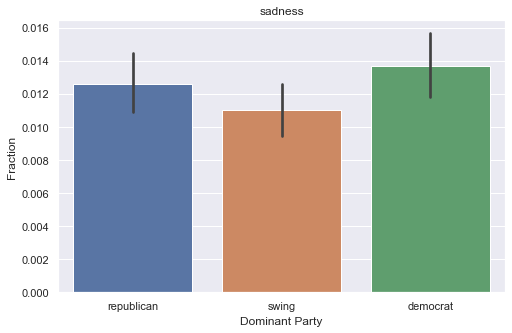

In [30]:
plotIndividualEmotion("sadness")

Similar: republican and democrat

### Anger

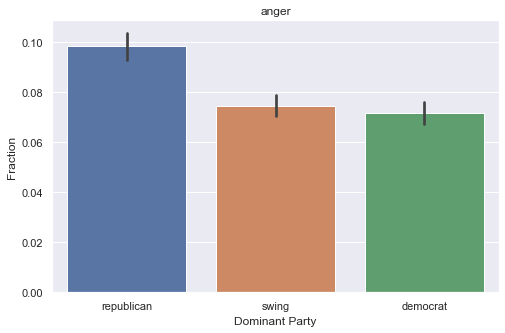

In [31]:
plotIndividualEmotion("anger")

Similar: swing and democrat

### Fear

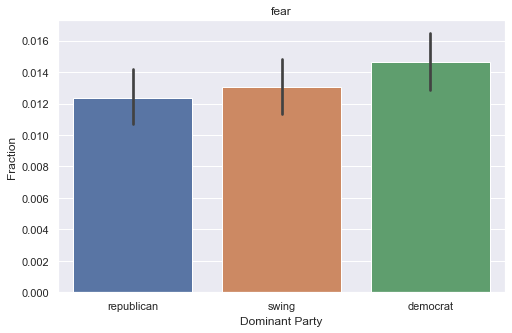

In [32]:
plotIndividualEmotion("fear")

Similar: swing and democrat

### Surprise

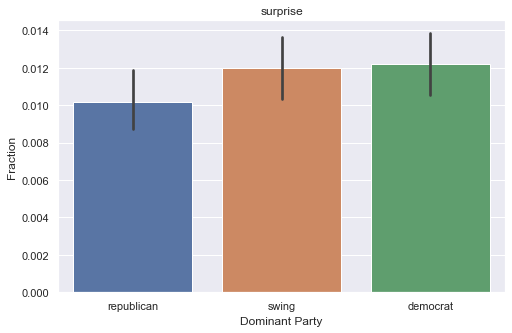

In [33]:
plotIndividualEmotion("surprise")

Similar: swing and democrat

### Disgust

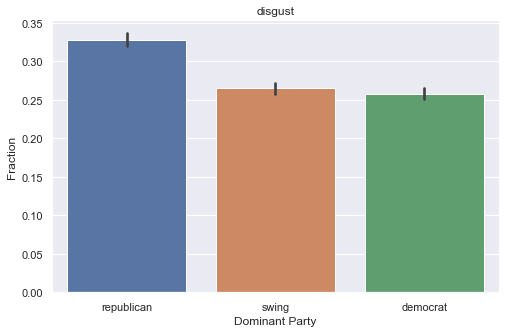

In [34]:
plotIndividualEmotion("disgust")

Similar: swing and democrat

### Others

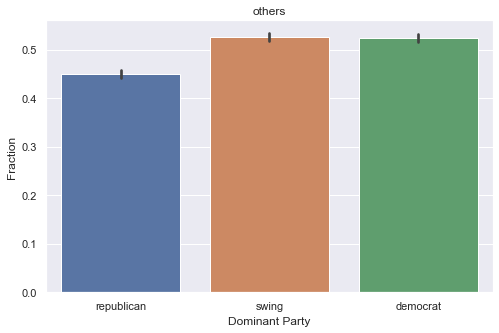

In [35]:
plotIndividualEmotion("others")

Similar: swing and democrat

## Analysis driven by the dominant emotion in individual tweets

In [36]:
def assignEmotion(dataframe, emotions_columns):
    dominant_emotion = dataframe[emotions_columns].idxmax(axis=1)
    return dominant_emotion

In [37]:
dominant_emotions_individual_tweets = assignEmotion(df, ["others",
                                                         "joy", 
                                                         "sadness", 
                                                         "fear", 
                                                         "surprise", 
                                                         "anger", 
                                                         "disgust"])

In [38]:
df = df.assign(dominant_emotion=dominant_emotions_individual_tweets)

In [39]:
df.groupby("dominant_party")["dominant_emotion"].describe()

,count,unique,top,freq
dominant_party,,,,
democrat,10000,7,others,5394
republican,10000,7,others,4604
swing,10000,7,others,5424


## 5 most common emotions for all groups of states

The labels were assigned for each tweet in accordance with the emotions for which the likelihood had the higest score. These labels are analyzed in a state group scale (democrat / republican / swing)

In [40]:
for party in ["democrat", "republican", "swing"]:
    tuples = df[df.dominant_party == party]["dominant_emotion"]
    counter_e = Counter(tuples.ravel())
    print(f"[{party}]:\t{counter_e.most_common(5)}")

[democrat]:	[('others', 5394), ('disgust', 2637), ('joy', 985), ('anger', 665), ('fear', 115)]
[republican]:	[('others', 4604), ('disgust', 3391), ('anger', 927), ('joy', 811), ('sadness', 104)]
[swing]:	[('others', 5424), ('disgust', 2701), ('joy', 903), ('anger', 689), ('fear', 105)]


In [41]:
df.to_csv("data/with_dominant_emotion_label.csv")

## Summary

It seems that there is no drastic difference between the emotions intensities for the red / blue / swing states. All of the distributions have a similar shape - hill on the left for negative emotions, the biggest hill in the middle for neutral emotions and a slight hill on the right - for positive emotions. The difference is that in republican states, there were more negative emotions in tweets compared to democrat or swing states, and that in swing states there were more neutral emotions.

On average, the most negative intensity for emotions was recorded in states such as Hawaii, Vermont, Idaho and the most positive in states such as Delaware, New Mexico and Maryland. The analysis of standard deviations for the emotions intensities among states and then the analysis of the mean and mdian for these standard deviations have shown that the scatter in emotions is not skewed in any direction. The least deviation around the mean of emotions intensity was found in Vermont (std = 4.09) and the biggest in New Mexico (std = 6.5). Considering that the critical values for these intensities were -10 and 10, the standard deviation of between 4-6.5 can be considered quite high, indicating that the values were located not only close to the mean.

The most common emotion apart from others (or neutral) was disgust which was determined both at the *state-level* (cell number 20), as well as on the *dominant-party level* (cell number 40). 3 states had the most dominant emotion (apart from neutral) other than disgust, these were: Delware: joy, Maine: anger, New Mexico: joy.

For the emotions grouped by party dominance it was quite difficult to spot an indication of some evident tendency, apart from the mentioned results: slightly higer number for angry/disgusted attitudes in republican states and much more neutrality in the swing states and in the blue states than in the red states. In the context of individual emotions, similar pattern was found for swing and democrat states, however, apart from *anger*, *disgust* and *others* the dissimilarities were minor.